# Calcualtion Code:


### Analysis of `To estimate the temperature of an artificial star by photometry` experiment
Exp Date : 3rd Feb, 23

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

In [2]:
# Write Data file:
df = pd.read_excel('ArtStar_Data.xlsx')
df

,B_flux,B_error,V_flux,V_error
0,36,1,133,1
1,39,1,148,1
2,59,1,235,1
3,79,1,325,1
4,97,1,401,1
5,118,1,492,1
6,128,1,525,1
7,152,1,625,1
8,164,1,702,1
9,249,4,1055,5


In [3]:
def Color_Index(data):
    ci = np.array(-2.5 * np.log10(data["B_flux"]/data["V_flux"]))
    ci_high = np.array(-2.5 * np.log10((data["B_flux"]-data["B_error"])/(data["V_flux"]+data["V_error"])))
    ci_low = np.array(-2.5 * np.log10((data["B_flux"]+data["B_error"])/(data["V_flux"]-data["V_error"])))
    return [ci, ci_high, ci_low]

In [4]:
ci, ci_high, ci_low = Color_Index(df)
x = np.array([i for i in range(len(df['B_flux']))])


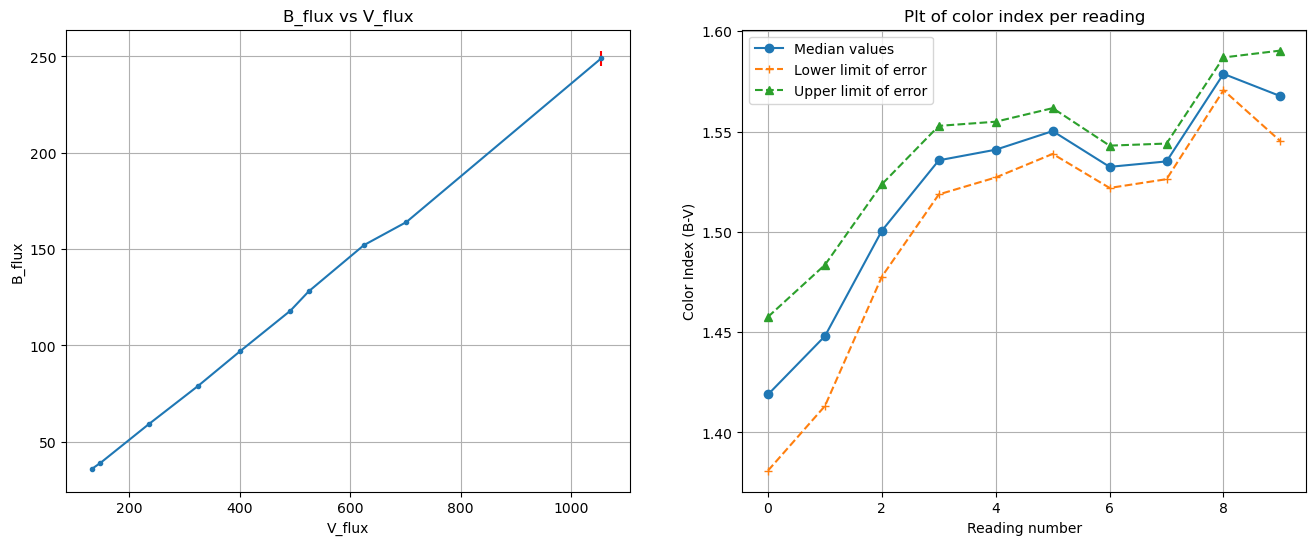

In [5]:
fig = plt.figure(figsize = (16, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.errorbar(df['V_flux'], df['B_flux'], xerr = df['V_error'], yerr = df['B_error'], fmt='.-', ecolor = 'red')
ax1.set_xlabel("V_flux")
ax1.set_ylabel("B_flux")
ax1.set_title("B_flux vs V_flux")
ax1.grid()

ax2.plot(x, ci, '-o', x,ci_low, '+--', x, ci_high, '^--')
ax2.set_title("Plt of color index per reading")
ax2.set_xlabel("Reading number")
ax2.set_ylabel("Color Index (B-V)")
ax2.legend(['Median values', 'Lower limit of error', 'Upper limit of error'])
plt.grid()

plt.show()

--------

Color Index-Temperature relation mantioned in the slides,

$$
T \approx 7000(\frac{1}{(B-V) + 0.56})\ K
$$

In [6]:
def ColIdx_to_temp(col_idx):
    # t = 4600*(1/(0.92*col_idx + 1.7) + 1/(0.92*col_idx + 0.62))    # Another relation that we can use
    t = 7000 * (1/(col_idx + 0.56))
    return t

In [7]:
T = ColIdx_to_temp(ci)
T_low = T - ColIdx_to_temp(ci_high)
T_high = ColIdx_to_temp(ci_low) - T

df_new = {'Color Index(CI)': ci, 'CI_neg_error': ci_low-ci, 'CI_pos_error': ci_high-ci,
         'Temperature(T) [K]': T, 'T_neg_error [K]': -T_low, 'T_pos_error [K]': T_high}
df_new = pd.DataFrame(df_new)
df_new.to_excel('Calculated_data.xlsx')
df_new

,Color Index(CI),CI_neg_error,CI_pos_error,Temperature(T) [K],T_neg_error [K],T_pos_error [K]
0,1.418873,-0.037942,0.038719,3537.367243,-67.884613,69.150319
1,1.447993,-0.034849,0.035514,3486.068327,-60.584050,61.570505
2,1.500540,-0.022878,0.023170,3397.168348,-37.775764,38.142148
3,1.535641,-0.017003,0.017167,3340.267292,-27.140080,27.323163
4,1.540932,-0.013847,0.013955,3331.855265,-21.985833,22.105262
5,1.550208,-0.011371,0.011445,3317.208951,-17.894136,17.972506
6,1.532373,-0.010519,0.010582,3345.483277,-16.833921,16.904381
7,1.535091,-0.008858,0.008902,3341.143537,-14.137005,14.186546
8,1.578733,-0.008148,0.008186,3272.965572,-12.479723,12.516770
9,1.567633,-0.022461,0.022717,3290.041431,-34.756578,35.102635


In [8]:
avg_ci =np.average(ci)
avg_ci_low = np.average(ci_low)
avg_ci_high = np.average(ci_high)

print("Avg. value of color index : \t", avg_ci)
print("Avg. lower err value of color index(-err) : \t", avg_ci_low- avg_ci)
print("Avg. upper err value of color index(+err) : \t", avg_ci_high-avg_ci)

Avg. value of color index : 	 1.5208015606197318
Avg. lower err value of color index(-err) : 	 -0.018787757029152363
Avg. upper err value of color index(+err) : 	 0.01903574458070323


So, the color index value I am getting,
$$
B-V = 1.52 \pm 0.02
$$

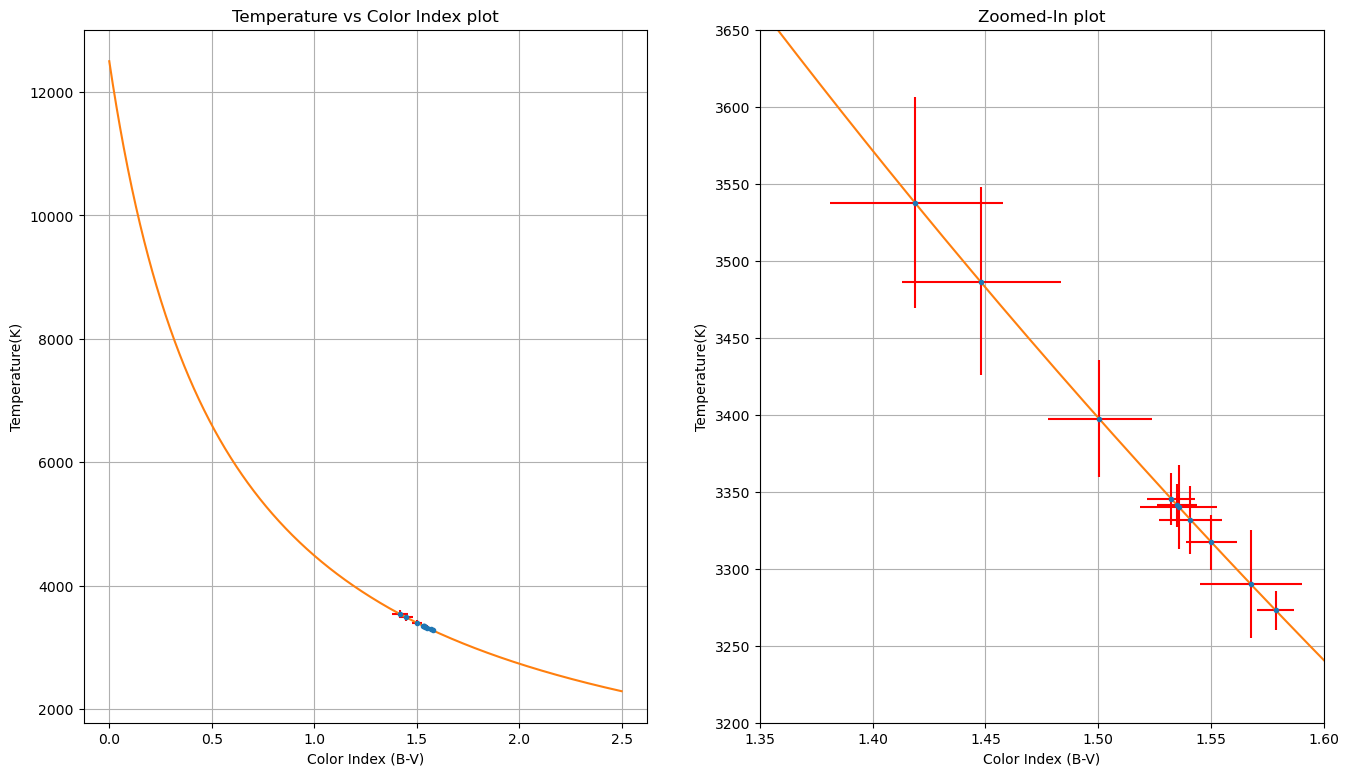

In [9]:
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ci_i = np.linspace(0, 2.5, 1000)
T_i = ColIdx_to_temp(ci_i)

ci_err = [ci-ci_low, ci_high-ci]
T_err = [T_low, T_high]


ax1.errorbar(x=ci, y=T, xerr=ci_err, yerr=T_err, fmt='.', ecolor = 'red')
ax1.plot(ci_i, T_i)
ax1.set_title("Temperature vs Color Index plot")
ax1.set_ylabel("Temperature(K)")
ax1.set_xlabel("Color Index (B-V)")
ax1.grid()

ax2.errorbar(x=ci, y=T, xerr=ci_err, yerr= T_err, fmt='.', ecolor = 'red')
ax2.plot(ci_i, T_i)
ax2.set_title("Zoomed-In plot")
ax2.set_ylabel("Temperature(K)")
ax2.set_xlabel("Color Index (B-V)")
ax2.grid()
ax2.set_xlim([1.35, 1.6])
ax2.set_ylim([3200, 3650])
plt.savefig(r"/home/mandal-anik/Desktop/Sem-4/Astrolab/ArtStar_Temp/ColIdvsTemp.png")
plt.show()

In [10]:
Temp = ColIdx_to_temp(avg_ci)
Temp_low = ColIdx_to_temp(avg_ci_high) - Temp
Temp_high = ColIdx_to_temp(avg_ci_low ) - Temp

print("Avg. value of Temperature : \t", Temp)
print("Avg. lower err value of Temperature(-err) : \t", Temp_low)
print("Avg. upper err value of Temperature(+err) : \t", Temp_high)

Avg. value of Temperature : 	 3364.088211234889
Avg. lower err value of Temperature(-err) : 	 -30.496612179155818
Avg. upper err value of Temperature(+err) : 	 30.65143008609448


So, the Temperature value I am getting,
$$
T_{Artificial\ Star} =  3364.09^{+31}_{-30}\ K
$$